In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [3]:
image_size = (150, 150)

In [4]:
model = keras.models.load_model('xception_v2_0_2_02_0.818.keras')

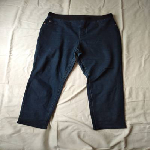

In [7]:
path = r'C:\Users\Lenovo\Desktop\mlbooc\clothing-dataset-small\test\pants\c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

In [8]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [9]:
pred = model.predict(X)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([-1.8246806 , -0.80614585, -0.58120936, -0.91545874,  9.248996  ,
       -1.127922  , -4.352077  ,  1.7283306 , -1.8289274 , -1.8253475 ],
      dtype=float32)

In [10]:
pred[0].argmax()

4

In [11]:
labels[pred[0].argmax()]

'pants'

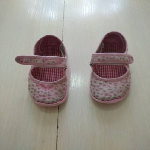

In [13]:
path = r'C:\Users\Lenovo\Desktop\mlbooc\clothing-dataset-small\test\shoes\3e35227b-2061-46eb-8379-a6844a4bd5ac.jpg'
img = load_img(path, target_size=(image_size))
img

In [14]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [15]:
pred = model.predict(X)
labels[pred[0].argmax()]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


'shoes'

In [16]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    r"C:\Users\Lenovo\Desktop\mlbooc\clothing-dataset-small\test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [18]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7481 - loss: 0.6942


[0.5891107320785522, 0.7876344323158264]